```python
step, histograms = filter_steps(steps=loss[:,0], values=loss[:, 1:10], from=100, to=500)
step, histograms = merge_histograms(steps=step, histograms=histograms, max_steps=100)
step, values = filter_steps(steps=loss[:,0], values=loss[:, 1:], from=100, to=500)
loss = np.concatenate(step, value)
losses = filter_dict(stocks, '*loss')
losses = {k: merge_steps_histogram(filter_steps(loss, from=100, to=500), max_steps=100) for k, loss in losses}
# losses = {k: filter_steps(loss, from=100, to=500) for k, loss in losses}

analytics.distribution(stocks['*loss'][100:5000],
                       width=400, height=300, height_minimap=50)
```

In [14]:
import numpy as np

size = 10000

# dummy loss data
losses = np.random.rand(size)
for i in range(1, size):
    losses[i] = losses[i-1] * 0.99 + losses[i]
print(losses[:10])

[0.60241891 0.64224198 0.8550113  1.6021552  2.05172504 2.6310553
 2.71825835 3.15580107 4.05202349 4.17516928]


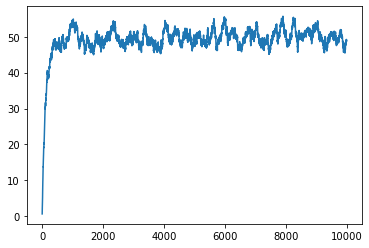

In [15]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [16]:
# create step data
steps = np.arange(size)

# create random data
data = [[loss + r for r in np.random.normal(size=1000)] for loss in losses]

In [17]:
np.array(data).shape

(10000, 1000)

In [18]:
# write data to text file
indicator = "loss"
with open("data.txt", "w") as f:
    for d,step in zip(data, steps):
        f.write(indicator + " " + str(step) + " ")
        f.write(" ".join([str(v) for v in d]) + "\n")
